* Unsupervised learninge geçiyoruz
* Suoervised learning : datanın labelları var
* Unsupervised learning : datanın labelları yk belli değil
* Reinforcement learning : kendi kendine ödül cezaya bağlı olarak bir dataya bağlı olmadan model oluşturmadır.

![resim](23.jpg)

* Bunları gruplamak istiyoruz.
* K =2 ile 2 grup olsun dedim.
* x1,x2 grafiği üzerinden rastgele random şekilde 2 tane centroid seçtim.
* her bir datapointi en yakınındaki centroide atıcam
* datayı grupluyorum böldüğüm kısımların ortalamasını alıyrom yani yeni centroidler buluyorum
* centroidlerin merkezi kaymış oldu şimdi yeniden noktaların centroid uzaklıklarını hesaplıcez ve bu işlem centroidlerin yeri değişmeyene kadar devam edecek
* k değerini nasıl seçecegimize de aşağıda bakalım 

![resim](24.jpg)

* 4 grup mu olmalı 2 grup mu k optimum nasıl belirlenir ?
* pi : point n : cluster
* cluster içindeki her pointin clusterın merkezine olan .
* 4 cluster için ayrı ayrı yap ve topla . amaç düşük wcss değeridir . wcss değerii ile k değeri arasında bir denge olmalıdır.
* k değerini sonsuza götürdüğümde wcss değeri 0  olur.ancak sonsuz küme sayısı olmaz . bir dengesiini bulmak lazım .
* dirsek değerine göre seçim yapılır. Azalan bir grafiğin varsa ve k değeri seçmek istiyorsan dirsek noktasını seçmelisin.
* bu örnek için optimum nokta k = 3 değeridir. 

In [17]:
# bu videoda kendi datasetimiz oluşturucaz. dataset oluştururken k = 3 secilecek şekilde oluşturulacak

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# %% create dataset

# class1
x1 = np.random.normal(25,5,1000) # 25 ortalaa 5 std sapmaya sahip 1000 değer üret ( gauss dağıım)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)

In [34]:
data.head()  # 2 tane feature 3000 tane de sample

,x,y
0,27.030827,30.110349
1,23.328050,25.268859
2,33.722955,23.105420
3,18.262489,25.611606
4,27.224967,26.583776


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [38]:
data.describe

<bound method NDFrame.describe of               x          y
0     27.030827  30.110349
1     23.328050  25.268859
2     33.722955  23.105420
3     18.262489  25.611606
4     27.224967  26.583776
...         ...        ...
2995  60.452917   9.134277
2996  50.314056   9.018428
2997  56.087067  14.890477
2998  47.341850  22.743851
2999  54.478530  18.445505

[3000 rows x 2 columns]>

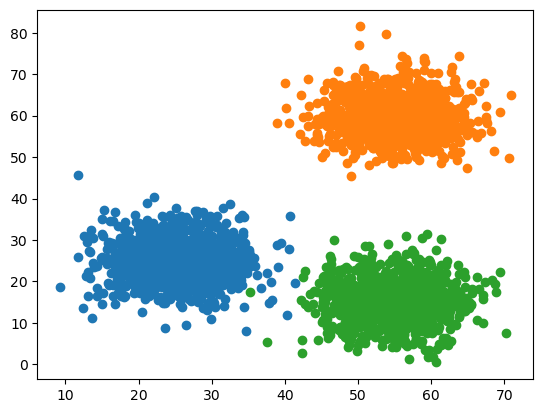

In [40]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show() # 3 class olduğunu biliyoruz ancak bunu dataya belirtmedik tabiki

In [44]:
## %% kmeans algoritması bunu gorecek
#plt.scatter(x1,y1,color = "black")
#plt.scatter(x2,y2,color = "black")
#plt.scatter(x3,y3,color = "black")
#plt.show() # algoritma bunu görür herhangi bir sınıfı görmez 

In [48]:
# %% KMEANS

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # her bir k için wcss değerini depolucaz

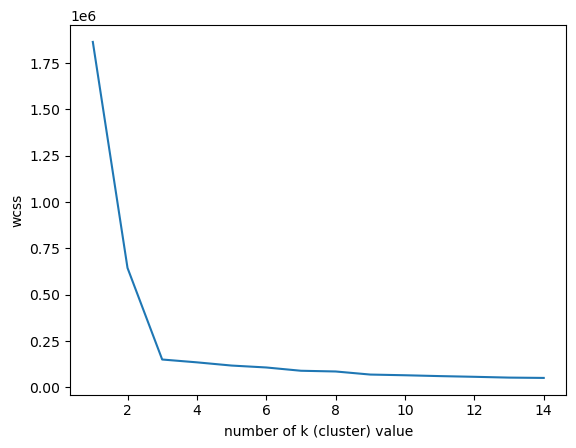

In [49]:
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()


In [52]:
# En güzel dirseği 3 te yapıyor ki biz de datasetimizi 3 gruba ayırmıştık oluşturken . Modelimiz doğru kümeliyor.

In [56]:
#%% k = 3 icin modelim

kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data) # modeli fit edip yani oluşturup predict yani tahmin ediyoruz.
data["label"] = clusters 

In [60]:
data.head(20)

,x,y,label
0,27.030827,30.110349,2
1,23.328050,25.268859,2
2,33.722955,23.105420,2
3,18.262489,25.611606,2
4,27.224967,26.583776,2
5,23.665623,29.619781,2
6,17.675075,28.923928,2
7,25.545090,22.261804,2
8,20.620499,29.608698,2
9,27.889815,25.988019,2


In [62]:
data.tail()

,x,y,label
2995,60.452917,9.134277,1
2996,50.314056,9.018428,1
2997,56.087067,14.890477,1
2998,47.341850,22.743851,1
2999,54.478530,18.445505,1


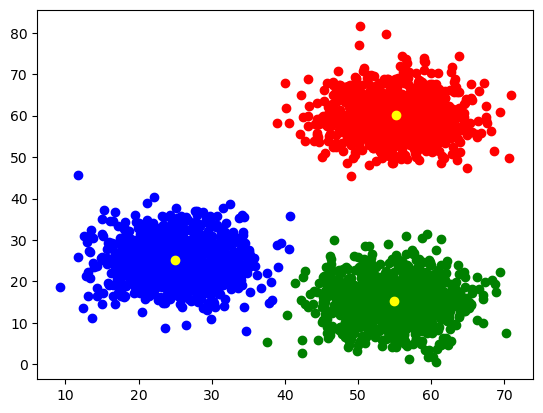

In [64]:
# labela göre filtreleyip x ve y eksenine göre de çizdiricez
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow") # centroidleri gösterdik. iki boyutlu bu 
plt.show()

In [66]:
# k means algoritmam datayı 3 e ayırdı ve mantıklı şekilde gruplandırdı
